#Customer Segmentation Using Unsupervised Learning


In [2]:
# Install dependencies (if not installed)
!pip install kagglehub[pandas-datasets] --quiet

import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd

# -----------------------------------
# Load dataset
# -----------------------------------
file_path = "Mall_Customers.csv"  # <-- Correct file inside the dataset

df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "sonalisingh1411/mallcustomersdataset",
    file_path,
)

print("Shape:", df.shape)
print("First 5 rows:")
print(df.head())


/tmp/ipython-input-3732158471.py:13: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


100%|██████████| 4.19k/4.19k [00:00<00:00, 5.62MB/s]

Shape: (200, 5)
First 5 rows:
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [3]:
# Dataset info
print("\nDataset Info:")
print(df.info())

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Check for null values
print("\nMissing Values:")
print(df.isnull().sum())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

Summary Statistics:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.7500

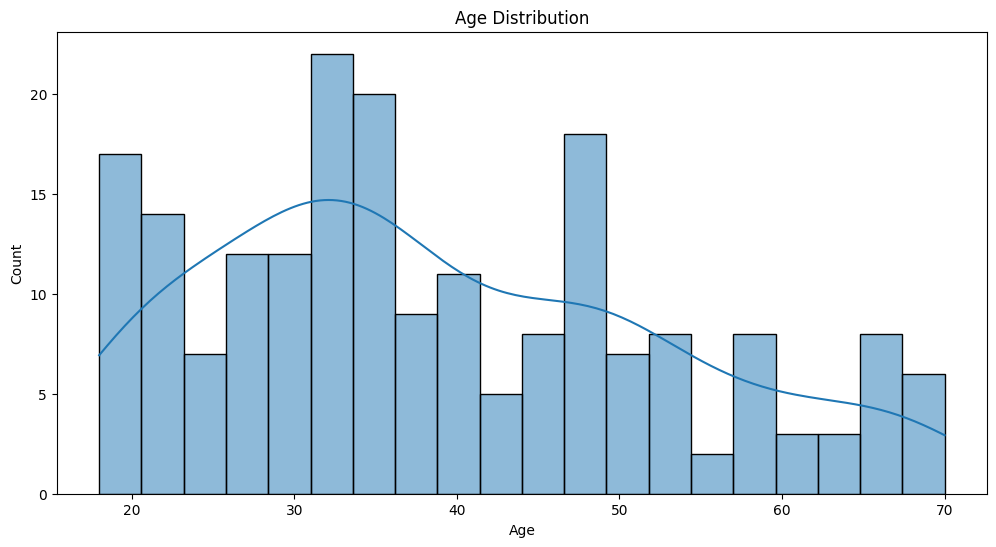

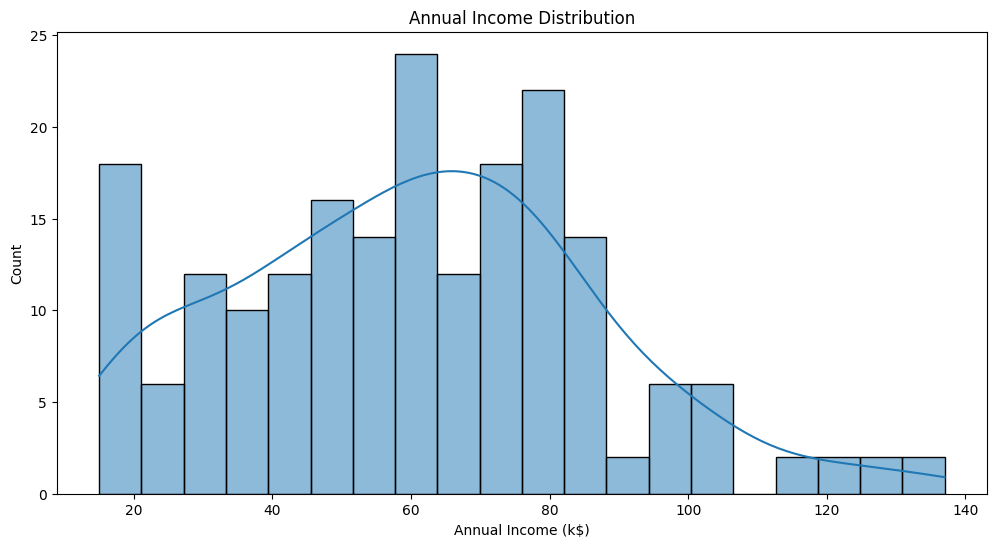

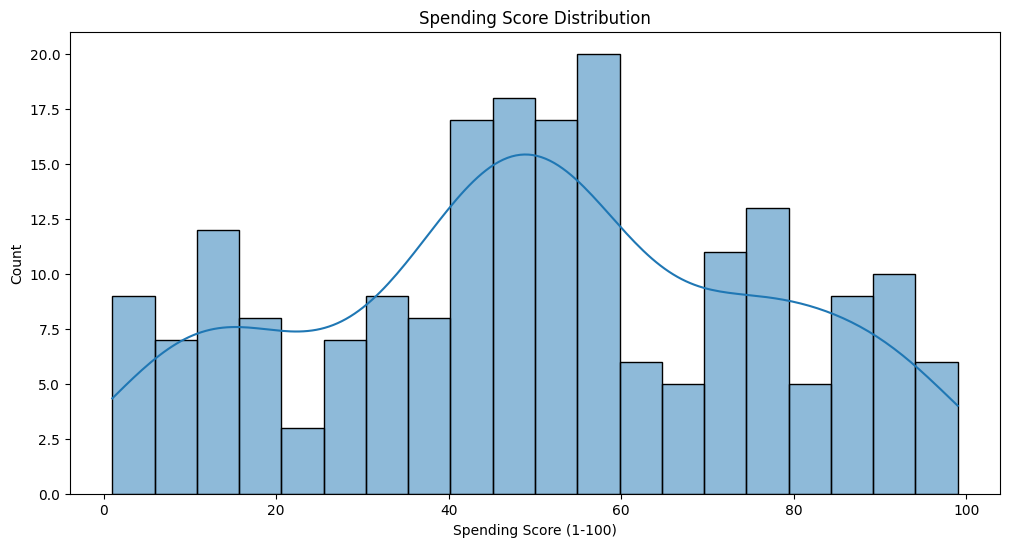

In [4]:
plt.figure(figsize=(12,6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()

plt.figure(figsize=(12,6))
sns.histplot(df['Annual Income (k$)'], bins=20, kde=True)
plt.title("Annual Income Distribution")
plt.show()

plt.figure(figsize=(12,6))
sns.histplot(df['Spending Score (1-100)'], bins=20, kde=True)
plt.title("Spending Score Distribution")
plt.show()


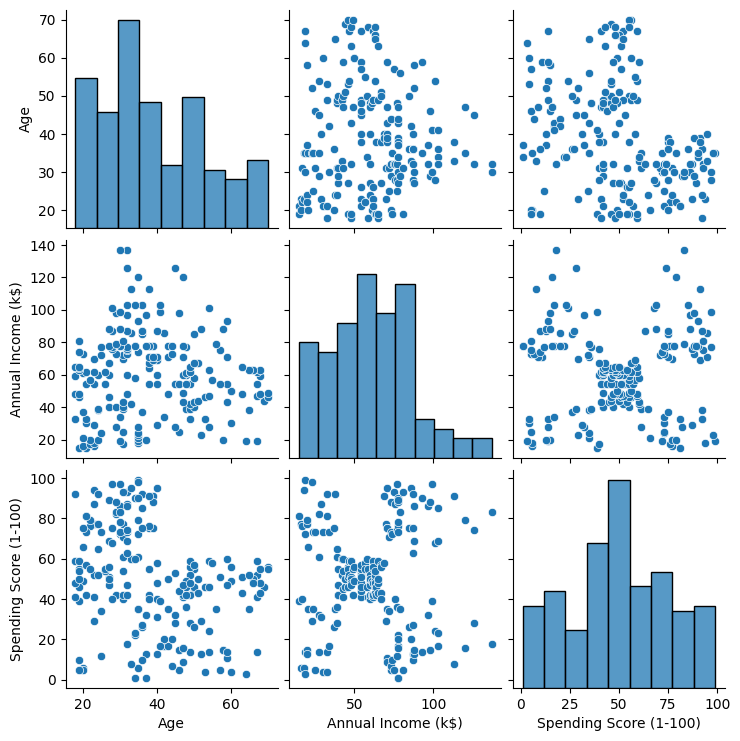

In [5]:
sns.pairplot(df[['Age','Annual Income (k$)','Spending Score (1-100)']])
plt.show()


In [6]:
# Selecting features
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Scaled Data (first 5 rows):")
print(X_scaled[:5])


Scaled Data (first 5 rows):
[[-1.42456879 -1.73899919 -0.43480148]
 [-1.28103541 -1.73899919  1.19570407]
 [-1.3528021  -1.70082976 -1.71591298]
 [-1.13750203 -1.70082976  1.04041783]
 [-0.56336851 -1.66266033 -0.39597992]]


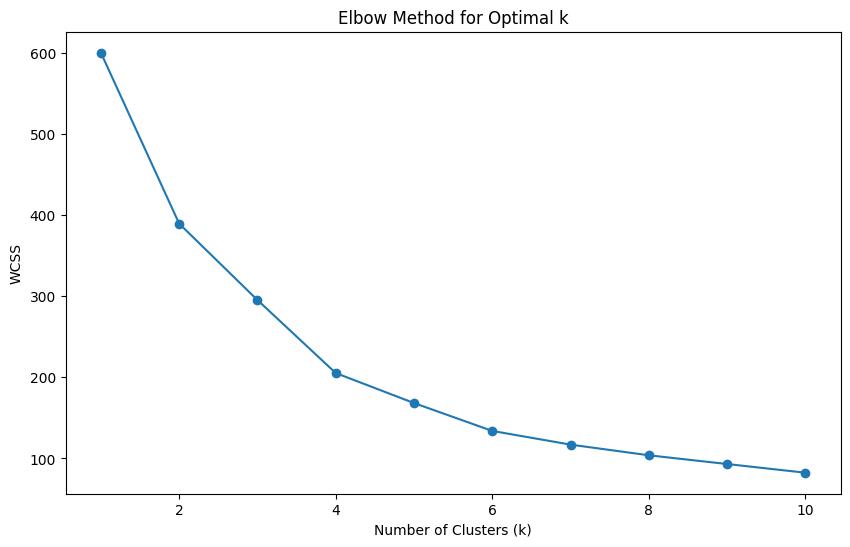

In [7]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1,11), wcss, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.show()


In [8]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

print("Cluster counts:")
print(df['Cluster'].value_counts())


Cluster counts:
Cluster
1    54
4    47
2    40
3    39
0    20
Name: count, dtype: int64


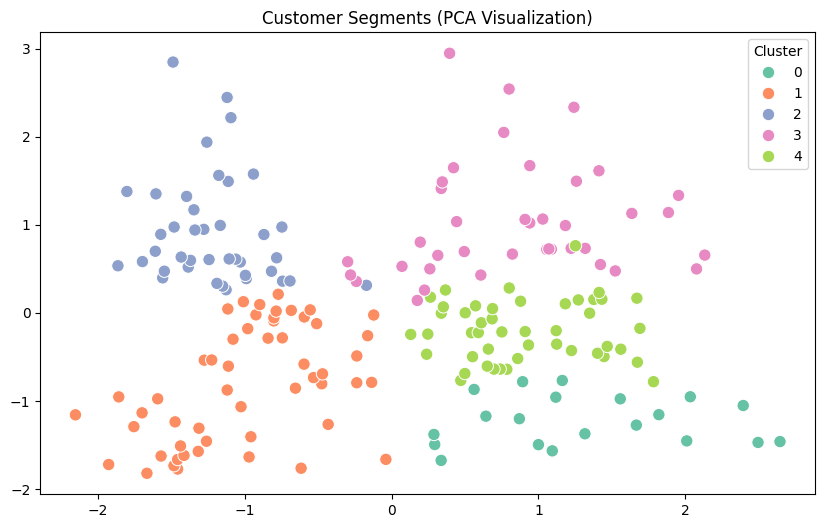

In [9]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['Cluster'], palette="Set2", s=80)
plt.title("Customer Segments (PCA Visualization)")
plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


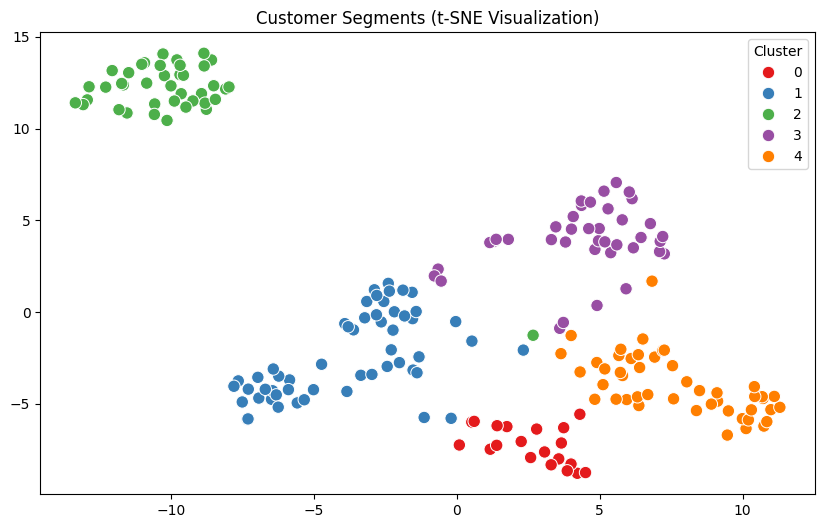

In [10]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=500)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(10,6))
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=df['Cluster'], palette="Set1", s=80)
plt.title("Customer Segments (t-SNE Visualization)")
plt.show()


In [11]:
# Cluster summary statistics
cluster_summary = df.groupby('Cluster')[['Age','Annual Income (k$)','Spending Score (1-100)']].mean()
print("\nCluster Summary:")
print(cluster_summary)

# Marketing strategies
print("\nSuggested Marketing Strategies:")
for cluster in cluster_summary.index:
    avg_income = cluster_summary.loc[cluster, 'Annual Income (k$)']
    avg_spending = cluster_summary.loc[cluster, 'Spending Score (1-100)']
    avg_age = cluster_summary.loc[cluster, 'Age']

    if avg_income > 60 and avg_spending > 60:
        strategy = "Premium Customers – Offer luxury products, exclusive deals, loyalty programs."
    elif avg_income > 60 and avg_spending < 40:
        strategy = "High Income but Low Spending – Use personalized marketing, discounts, exclusive experiences."
    elif avg_income < 40 and avg_spending > 60:
        strategy = "Young Budget-Conscious Shoppers – Focus on trendy affordable products and promotions."
    else:
        strategy = "Low Income & Low Spending – Promote essential products and basic offers."

    print(f"Cluster {cluster}: {strategy}")



Cluster Summary:
               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        46.250000           26.750000               18.350000
1        25.185185           41.092593               62.240741
2        32.875000           86.100000               81.525000
3        39.871795           86.102564               19.358974
4        55.638298           54.382979               48.851064

Suggested Marketing Strategies:
Cluster 0: Low Income & Low Spending – Promote essential products and basic offers.
Cluster 1: Low Income & Low Spending – Promote essential products and basic offers.
Cluster 2: Premium Customers – Offer luxury products, exclusive deals, loyalty programs.
Cluster 3: High Income but Low Spending – Use personalized marketing, discounts, exclusive experiences.
Cluster 4: Low Income & Low Spending – Promote essential products and basic offers.
